In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df_test = pd.read_csv('Data/test.csv')
df_train = pd.read_csv('Data/train.csv')
df_test.head()
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
df_train.isnull().sum()
df_test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [5]:
df_train.shape

(4250, 20)

In [6]:
df_test.shape

(750, 20)

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

1. Distribution of Churned vs. Non-Churned Customers

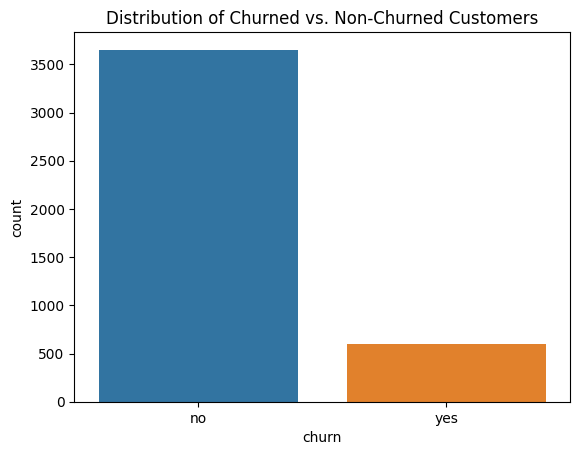

In [9]:
sb.countplot(x='churn', data=df_train)
plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.show()

In [10]:
df_train['churn'] = df_train['churn'].map({'yes': 1, 'no': 0})

# Verify the conversion
print(df_train['churn'].head())

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64


2. Churn Rate by State

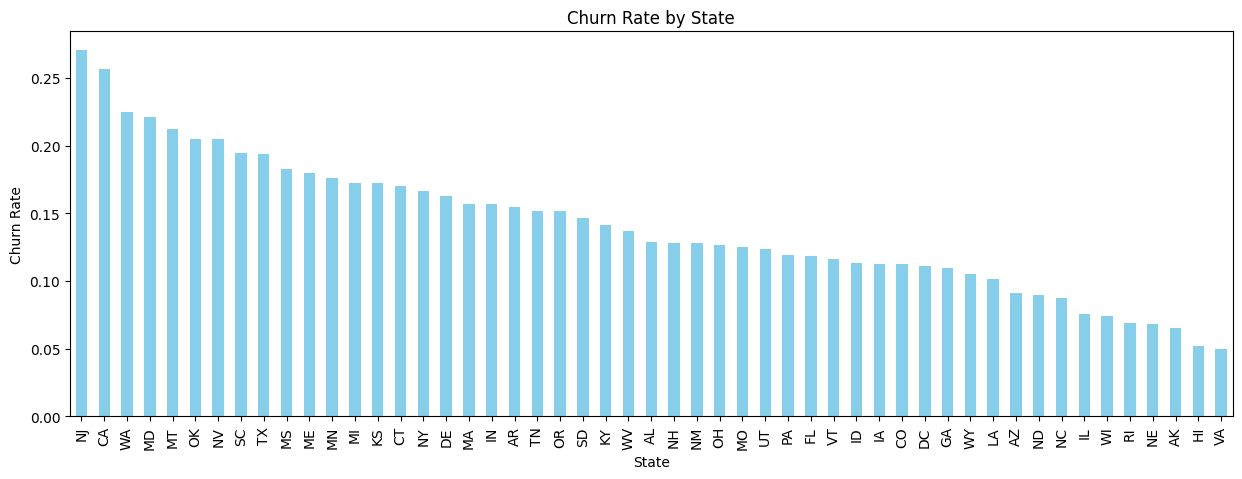

In [11]:
churn_by_state = df_train.groupby('state')['churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 5))
churn_by_state.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.show()


3. Churn Rate by Area Code

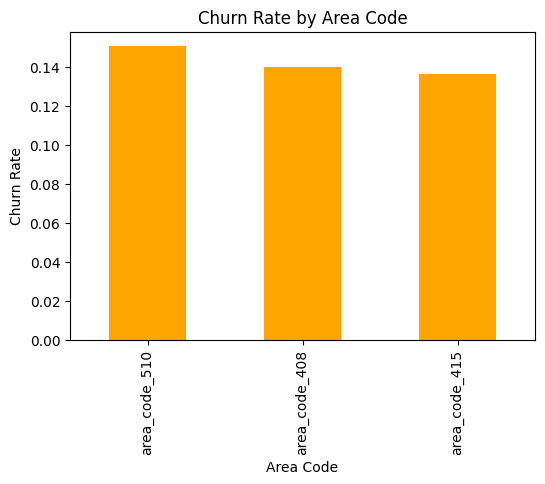

In [12]:
churn_by_area_code = df_train.groupby('area_code')['churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
churn_by_area_code.plot(kind='bar', color='orange')
plt.title('Churn Rate by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Churn Rate')
plt.show()


4. Churn Rate vs. International Plan

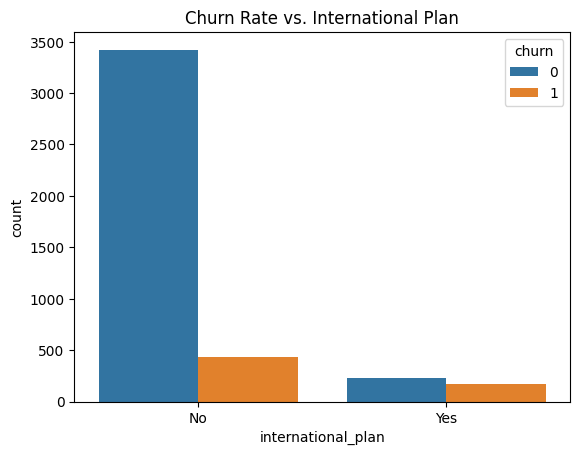

<Figure size 400x400 with 0 Axes>

In [13]:
sb.countplot(x='international_plan', hue='churn', data=df_train)
plt.title('Churn Rate vs. International Plan')
plt.xticks([0, 1], ['No', 'Yes'])
plt.figure(figsize=(4, 4))
plt.show()


5. Churn Rate vs. Voice Mail Plan

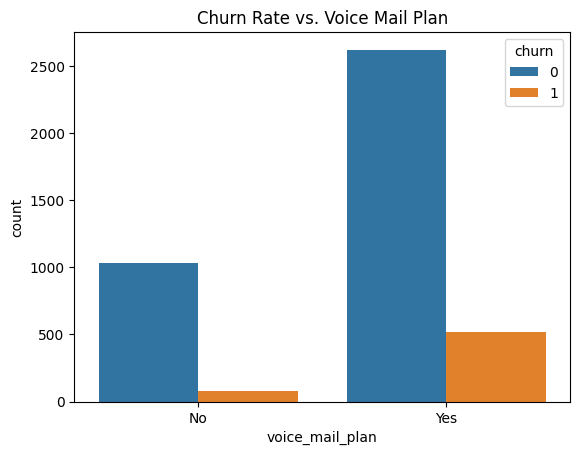

In [14]:
sb.countplot(x='voice_mail_plan', hue='churn', data=df_train)
plt.title('Churn Rate vs. Voice Mail Plan')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


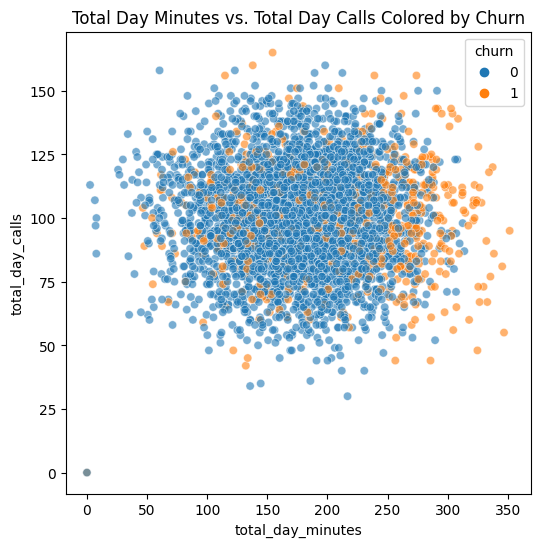

In [15]:
plt.figure(figsize=(6, 6))
sb.scatterplot(x='total_day_minutes', y='total_day_calls', hue='churn', data=df_train, alpha=0.6)
plt.title('Total Day Minutes vs. Total Day Calls Colored by Churn')
plt.show()


Checking the uniformity of data types in all columns

In [16]:


def check_uniform_dtype_all_columns(df_train):
    """
    Check if all elements in each column of a DataFrame have the same data type.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to check.
    
    Returns:
    dict: A dictionary where the keys are column names and the values are booleans indicating
          if all elements in the column have the same data type.
    """
    uniform_dtype = {}
    for column_name in df_train.columns:
        column = df_train[column_name]
        first_type = type(column.iloc[0])
        is_uniform = column.apply(lambda x: isinstance(x, first_type)).all()
        uniform_dtype[column_name] = is_uniform
    return uniform_dtype

# Example usage
# Assuming df is your DataFrame
uniform_dtype_results = check_uniform_dtype_all_columns(df_train)
print(uniform_dtype_results)


{'state': True, 'account_length': False, 'area_code': True, 'international_plan': True, 'voice_mail_plan': True, 'number_vmail_messages': False, 'total_day_minutes': False, 'total_day_calls': False, 'total_day_charge': False, 'total_eve_minutes': False, 'total_eve_calls': False, 'total_eve_charge': False, 'total_night_minutes': False, 'total_night_calls': False, 'total_night_charge': False, 'total_intl_minutes': False, 'total_intl_calls': False, 'total_intl_charge': False, 'number_customer_service_calls': False, 'churn': False}


Identify & Listing the Columns with Inconsistent Data Types

In [17]:
inconsistent_columns = [col for col, is_uniform in uniform_dtype_results.items() if not is_uniform]
print("Columns with inconsistent data types:", inconsistent_columns)


Columns with inconsistent data types: ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn']


 Checking Unique Data Types in Each Inconsistent Column

In [18]:
for column in inconsistent_columns:
    unique_types = df_train[column].apply(type).unique()
    print(f"Column '{column}' has the following unique data types: {unique_types}")


Column 'account_length' has the following unique data types: [<class 'int'>]
Column 'number_vmail_messages' has the following unique data types: [<class 'int'>]
Column 'total_day_minutes' has the following unique data types: [<class 'float'>]
Column 'total_day_calls' has the following unique data types: [<class 'int'>]
Column 'total_day_charge' has the following unique data types: [<class 'float'>]
Column 'total_eve_minutes' has the following unique data types: [<class 'float'>]
Column 'total_eve_calls' has the following unique data types: [<class 'int'>]
Column 'total_eve_charge' has the following unique data types: [<class 'float'>]
Column 'total_night_minutes' has the following unique data types: [<class 'float'>]
Column 'total_night_calls' has the following unique data types: [<class 'int'>]
Column 'total_night_charge' has the following unique data types: [<class 'float'>]
Column 'total_intl_minutes' has the following unique data types: [<class 'float'>]
Column 'total_intl_calls' h

In [19]:
# Check the data type of 'account_length' column using dtype
print(df_train['account_length'].dtype)


int64


Checking for Unique Values in Each Column


In [20]:
# Check the number of unique values in each column
unique_counts = df_train.nunique()
print("Number of unique values in each column:")
print(unique_counts)

# If you want to visualize the unique counts in a more readable format
for column, count in unique_counts.items():
    print(f"Column '{column}' has {count} unique values.")

Number of unique values in each column:
state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64
Column 'state' has 51 unique values.
Column 'account_length' has 215 unique values.
Column 'area_code' has 3 unique values.
Column 'international_plan' has 2 unique values.
Column 'voice_

Listing all the columns with int data type

In [21]:
int_columns = df_train.select_dtypes(include='int')
int_columns

,account_length,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,churn
0,107,26,123,103,103,3,1,0
1,137,0,114,110,104,5,0,0
2,84,0,71,88,89,7,2,0
3,75,0,113,122,121,3,3,0
4,121,24,88,108,118,7,3,0
...,...,...,...,...,...,...,...,...
4245,83,0,70,88,79,6,0,0
4246,73,0,89,82,89,6,3,0
4247,75,0,101,126,104,7,1,0
4248,50,40,127,126,116,5,2,0


In [31]:
float_columns = df_train.select_dtypes(include='float')
float_columns

,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_charge
0,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70
1,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29
2,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78
3,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73
4,218.2,37.09,348.5,29.62,212.6,9.57,7.5,2.03
...,...,...,...,...,...,...,...,...
4245,188.3,32.01,243.8,20.72,213.7,9.62,10.3,2.78
4246,177.9,30.24,131.2,11.15,186.2,8.38,11.5,3.11
4247,170.7,29.02,193.1,16.41,129.1,5.81,6.9,1.86
4248,235.7,40.07,223.0,18.96,297.5,13.39,9.9,2.67


In [27]:
# Convert 'yes' to 1 and 'no' to 0
df_train['international_plan'] = df_train['international_plan'].replace({'yes': 1, 'no': 0})
df_train['voice_mail_plan'] = df_train['voice_mail_plan'].replace({'yes': 1, 'no': 0})

df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [23]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [28]:
# Convert 'yes' to 1 and 'no' to 0
df_test['international_plan'] = df_test['international_plan'].replace({'yes': 1, 'no': 0})
df_test['voice_mail_plan'] = df_test['voice_mail_plan'].replace({'yes': 1, 'no': 0})

df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'area_code' column in the training dataset
df_train['area_code_encoded'] = label_encoder.fit_transform(df_train['area_code'])

# Transform 'area_code' column in the test dataset using the same encoder
df_test['area_code_encoded'] = label_encoder.transform(df_test['area_code'])

# Drop the original 'area_code' column from both datasets
df_train.drop('area_code', axis=1, inplace=True)
df_test.drop('area_code', axis=1, inplace=True)

# Display the first few rows of the transformed datasets
print("Training dataset after encoding:")
print(df_train.head())
print("\nTest dataset after encoding:")
print(df_test.head())


Training dataset after encoding:
  state  account_length  international_plan  voice_mail_plan   
0    OH             107                   0                1  \
1    NJ             137                   0                0   
2    OH              84                   1                0   
3    OK              75                   1                0   
4    MA             121                   0                1   

   number_vmail_messages  total_day_minutes  total_day_calls   
0                     26              161.6              123  \
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge   
0             27.47              195.5              103             16.62  \
1             41.38              121.2     